<a href="https://colab.research.google.com/github/parwinderau/machinelearning/blob/main/DroneAsnmnt_FR_Sc_130Rcrd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
with open("./sample_data/Drone_Data_clnd130.csv", 'r',encoding = "utf-8") as file:
    for i in range(0,4):
        print(file.readline())

﻿Model,L,W,H,P,V,S

AAI Shadow 200,3400,4200,1050,1,2,48.61

AAI Shadow 400,3841,5150,112,1,2,51.39

AAI Shadow 600,4800,6830,1120,1,2,55.56



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model

print("If there are no errors, modules are load!")

If there are no errors, modules are load!


In [11]:
import pandas as pd

# Here we upload the data from csv files using pandas
# the comma separates the coulms and we see the countries in each line.
dataFrame = pd.read_csv("./sample_data/Drone_Data_clnd130.csv", delimiter=',', encoding='utf-8') 

#print(drdata.head())

In [12]:
# Now we want to separate those from the dataset
from sklearn import preprocessing
df_l_w_h = dataFrame[["L", "W","H"]]
#print(drdata_l_w_h.head())



In [13]:
#df_l_w_h.isnull()
#Print Count of null values for each coloumn 
print(df_l_w_h.isnull().sum())

L     0
W     0
H    14
dtype: int64


In [14]:

# drop all rows with any NaN and NaT values
df_l_w_h = df_l_w_h.dropna()
print(df_l_w_h.isnull().sum())

L    0
W    0
H    0
dtype: int64


In [15]:
# Now we need to order the data according to the growing score
df_sorted = df_l_w_h.sort_values(by=["H"],ascending=True)
#https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

df_sorted.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)
#Tell you rows and columns in oyur data
df_sorted.shape

#print(drdata_sorted.head(38))

(122, 3)

In [16]:
#correlation between paramters
print(df_sorted.corr())

          L         W         H
L  1.000000  0.793645  0.841842
W  0.793645  1.000000  0.808515
H  0.841842  0.808515  1.000000


In [17]:
#d = preprocessing.normalize(df_sorted)
d = df_sorted
df_normalized = pd.DataFrame(d, columns=["L", "W","H"])
df_normalized.head()

,L,W,H
98,155,300,60.0
1,3841,5150,112.0
35,820,1400,120.0
124,680,860,200.0
89,1200,1980,200.0


In [18]:
print(df_normalized.head(38))

        L     W      H
98    155   300   60.0
1    3841  5150  112.0
35    820  1400  120.0
124   680   860  200.0
89   1200  1980  200.0
77    860  1320  240.0
78    700  1200  250.0
55   1800  2000  300.0
67    900  2000  300.0
71   1400  1600  300.0
102  1200  1300  300.0
17   1820  2900  300.0
25   1800  3400  300.0
117  1000  1400  300.0
79   2200  3000  350.0
26    980  1500  350.0
65    970  1200  360.0
44    900   850  360.0
72   2400  2800  380.0
64   1980  3120  380.0
92   1500  2100  400.0
76   2400  3200  400.0
34   1220  2440  400.0
33    790  1200  400.0
30   2400  3000  400.0
63   1370  3110  400.0
125  1800  2300  400.0
24   1500  2000  400.0
13   1830  3050  400.0
103  2140  3120  400.0
14   2080  3940  420.0
131  1800  2210  430.0
96   1830  3660  440.0
52   2000  3300  440.0
56   2600  3200  450.0
88   2500  2350  450.0
132  2500  3200  450.0
108  3200  3500  460.0


In [19]:
print(df_normalized.describe())

                  L             W            H
count    122.000000    122.000000   122.000000
mean    4402.909836   6594.508197  1054.934426
std     4286.015000   7598.433734   860.111820
min      155.000000    300.000000    60.000000
25%     2000.000000   2907.500000   422.500000
50%     2800.000000   3920.000000   855.000000
75%     4782.500000   6455.000000  1242.500000
max    22000.000000  53000.000000  4200.000000


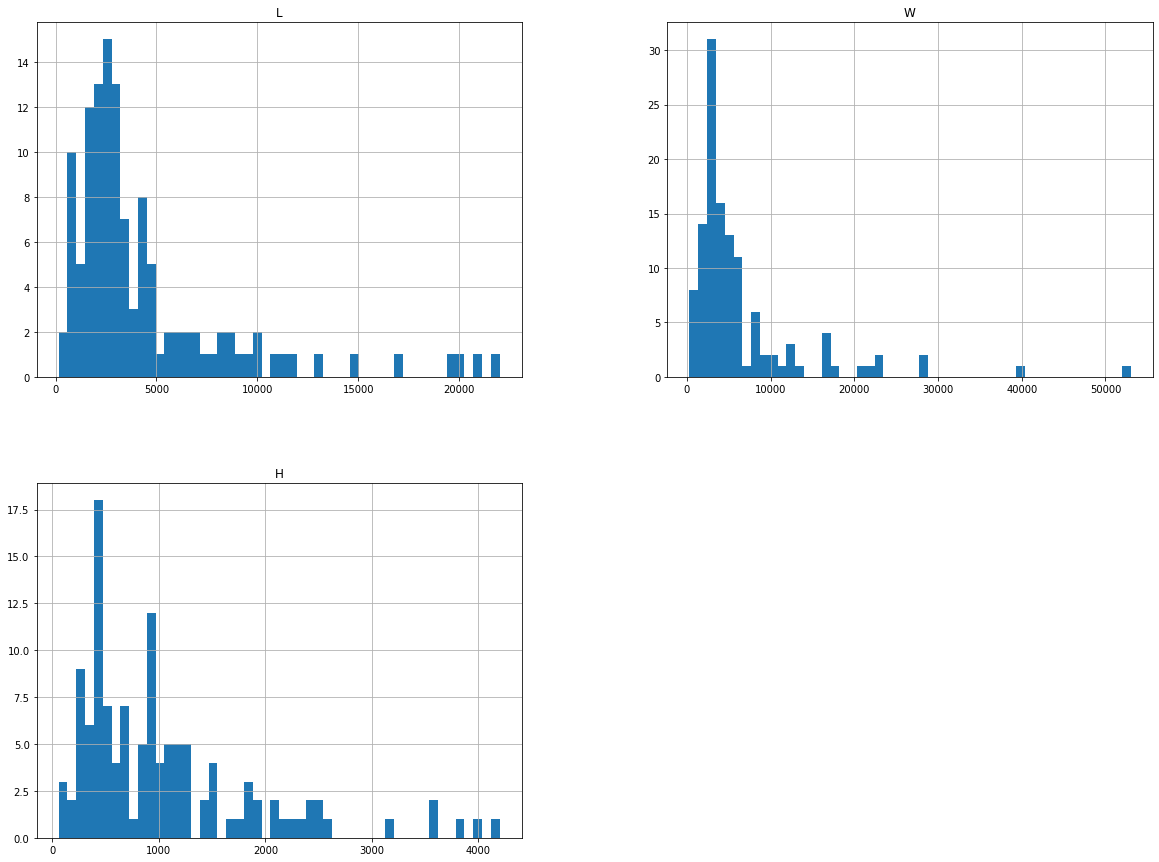

In [33]:
#Multiple linear Regressor
#https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/

%matplotlib inline
import matplotlib.pyplot as plt
df_normalized.hist(bins=50, figsize=(20,15))
#save_fig('histograms')
plt.show()

In [42]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
'''
d= df_normalized.drop(columns = 'H')
d=preprocessing.normalize(d)
X=pd.DataFrame(d, columns=["L", "W"])
'''
X= df_normalized.drop(columns = 'H')
y=df_normalized['H']
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)
#test_set.head()

In [43]:
y.head(11)

98      60.0
1      112.0
35     120.0
124    200.0
89     200.0
77     240.0
78     250.0
55     300.0
67     300.0
71     300.0
102    300.0
Name: H, dtype: float64

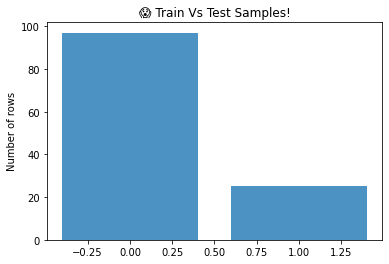

In [44]:

d_names = (X_train, y_test)
y_pos = range(len(d_names))
plt.bar(
    y_pos, 
    (X_train.shape[0], y_test.shape[0]), 
    align='center', 
    alpha=0.8
)

plt.ylabel('Number of rows') 
plt.title('😱 Train Vs Test Samples!')
plt.show()


In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#X_train_scaled = X_train
#X_test_scaled = X_test
#df_prepared = full_pipeline.fit_transform(df_lw)
#label_prepared = full_pipeline.transform(df_h_label) 
#df_prepared
X_test_scaled

array([[-0.47757619, -0.50440539],
       [-0.21985253, -0.1738755 ],
       [-0.50100561, -0.54254345],
       [ 0.36588306,  0.29649396],
       [-0.75872927, -0.60864943],
       [ 0.08472997, -0.16116281],
       [-0.3838585 , -0.46626732],
       [ 0.88133037,  0.41090815],
       [-0.61815273, -0.57941025],
       [-0.54786446, -0.38999119],
       [ 1.48112362, -0.18277438],
       [ 3.5991435 ,  1.93643072],
       [-0.75872927, -0.69509571],
       [-0.08396188, -0.08488668],
       [ 0.28153713,  0.17445216],
       [-0.61346685, -0.4916927 ],
       [-0.94639895, -0.13573743],
       [-0.57129388, -0.55525614],
       [ 1.67793077,  2.76275544],
       [-1.00356675, -0.82222259],
       [-0.61815273, -0.56796883],
       [-0.3838585 , -0.44084195],
       [-0.43071734, -0.30100238],
       [ 0.00975582, -0.08488668],
       [-0.47757619, -0.47898001]])

In [46]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

#reg = LogisticRegression(random_state=42)
reg = RandomForestRegressor(n_estimators=10, random_state=42)
#reg = SVR(kernel="linear")
#reg = LinearRegression()
reg.fit(X_train_scaled,y_train)


RandomForestRegressor(n_estimators=10, random_state=42)

In [47]:
reg.predict(X_train_scaled)


array([ 709.        , 2410.        , 1341.        ,  537.        ,
       1760.        ,  338.        ,  330.        ,  830.75      ,
        440.        , 2690.        ,  984.        , 1172.        ,
        555.        ,  950.25      ,  899.        ,  305.        ,
        510.        ,  416.        ,  772.        ,  374.        ,
       3762.        , 2520.        ,  198.        ,  891.        ,
        914.75      ,  726.        ,  745.66666667,  522.        ,
        353.        ,  785.        ,  699.        , 1172.        ,
        330.        ,  605.        , 1052.        ,  528.88095238,
       1020.        ,  350.        ,  382.        , 1950.        ,
       2240.        ,  310.        ,  311.        , 1172.        ,
        230.        ,  354.        ,  550.        , 1275.        ,
        265.        , 1016.        , 1906.        , 1560.        ,
       1084.        ,  676.        , 1004.        ,  580.        ,
       2159.        ,  950.25      , 3220.        , 1031.5    

In [48]:
reg.score(X_train_scaled,y_train)

0.9488747050593974

In [49]:
reg.score(X_test_scaled,y_test)

0.8218888859866584

In [50]:
#value wise prediction
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]
# Part of the dataset (not used for training) is used to build for the prediction
some_data_prepared = scaler.transform(some_data)

print("Predictions:", reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 709. 2410. 1341.  537. 1760.]
Labels: [520.0, 1900.0, 1390.0, 450.0, 1760.0]


In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

df_predictions = reg.predict(X_train_scaled)
mse = mean_squared_error(y_train, df_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, df_predictions)
#print('My name is', os.getlogin(), 'and I am', 42)
print ('RMSE:', rmse, 'and MAE:', mae) 

RMSE: 193.08089555025515 and MAE: 126.02093765341188


In [52]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
from sklearn.model_selection import cross_val_score
# cross_val_score is a way to use the cross-validation in sklearn.
# cross validation https://scikit-learn.org/stable/modules/cross_validation.html
cross_validation_scores = cross_val_score(reg, X_train_scaled, y_train,
                                          scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-cross_validation_scores)
display_scores(rmse_scores)

Scores: [668.64471134 238.5890295  242.05202127 265.80475813 262.65395485
 774.9531831  583.86699437 448.28085883 318.2615975  677.39655363]
Mean: 448.050366252226
Standard deviation: 199.32711438028704
